# Unificandos as amostras em um único dataset

Todas as amostras foram feitas com:
* Tempo de switch de 2us 
* Intervalo de transmissão da tag de 100ms
* intervalo de transmissão do gateway de 200ms 
* 4dbm de potencia de transmissão

As amostragens *tw, camila e poli* foram feitas com:
* Configuração de switch 22056
* Broker público
* CTE = 10

A amostragem *tw2* foi feita com:
* Configuração de switch: 2,2,2,0,5,6,14,13,8,10 (traduzindo em 11 12 1 2 8 7 6 5) 
* Broker local
* CTE = 20

In [224]:
import pandas as pd
import numpy as np
import os

In [225]:
def pm(angle):
    if angle > np.pi:
        while angle > np.pi:
            angle -= 2*np.pi
    if angle < -np.pi:
        while angle < -np.pi:
            angle += 2*np.pi
    return angle

pm = np.vectorize(pm)


def single_antenna_to_dataframe(read_fp: str, write_fp=None) -> pd.DataFrame:
    '''Transforma uma captura com uma única antena em um df '''
    raw =pd.read_json(read_fp)
    df= list()
    for group in raw[1]:
        df.append(group)
    df = pd.DataFrame(df)
    df = df.join(pd.DataFrame(df["aoa"].to_list()))
    df.pop("aoa")

    if write_fp is not None:
        df.to_json(write_fp)

    return df

# TW
Capturas no poli foram feitas a distância constante com o centro dos ângulos **na antena de referência**

In [226]:
tw= pd.DataFrame()

for file in os.listdir("tw"):
    df = single_antenna_to_dataframe("./tw/"+file)
    df["angle"] = float(file.split("-")[0].split("_")[-1]) -90
    df["distance"] = float(file.split("-")[1].split("_")[-1].split(".")[0])
    tw = pd.concat((tw,df))
tw["capture"] = "tw"
tw.pop("raw")
tw.pop("no")
tw["switch_order"] = "2-2-0-5-6"
tw

,mac,timestamp,rssi,frequency,iq,angle,distance,capture,switch_order
0,c300000a7a48,2024-10-04T17:03:27.558Z,-55,2402,"[94, -140, 123, 116, -137, 97, -71, -157, 158,...",-90.0,100.0,tw,2-2-0-5-6
1,c300000a7a48,2024-10-04T17:03:28.091Z,-57,2426,"[-128, -79, 107, -107, 93, 114, -134, 59, -37,...",-90.0,100.0,tw,2-2-0-5-6
2,c300000a7a48,2024-10-04T17:03:28.614Z,-57,2426,"[107, 103, -122, 86, -68, -138, 140, -44, 21, ...",-90.0,100.0,tw,2-2-0-5-6
3,c300000a7a48,2024-10-04T17:03:29.148Z,-59,2480,"[-3, 185, -180, -18, 42, -180, 166, 73, -107, ...",-90.0,100.0,tw,2-2-0-5-6
4,c300000a7a48,2024-10-04T17:03:29.409Z,-59,2480,"[-175, -39, 79, -163, 159, 106, -114, 147, -11...",-90.0,100.0,tw,2-2-0-5-6
...,...,...,...,...,...,...,...,...,...
210,c300000a7a63,2024-10-04T15:47:50.610Z,-52,2426,"[-16, -157, 151, 21, -55, 150, -139, -70, 95, ...",0.0,200.0,tw,2-2-0-5-6
211,c300000a7a63,2024-10-04T15:47:51.134Z,-55,2480,"[-37, -174, 165, -7, -47, 163, -155, -80, 106,...",0.0,200.0,tw,2-2-0-5-6
212,c300000a7a63,2024-10-04T15:47:51.671Z,-55,2480,"[-163, -70, 97, -141, 92, 134, -160, 70, -36, ...",0.0,200.0,tw,2-2-0-5-6
213,c300000a7a63,2024-10-04T15:47:52.197Z,-52,2402,"[169, 66, -102, 125, -131, -124, 137, -85, 23,...",0.0,200.0,tw,2-2-0-5-6


# Poli
Capituras no Poli foram feitas a uma distância horizontal constante e logo precisa ser concertada e com o centro **no centro geometrico da antena (entre as antenas 12 e 1)**


In [227]:
poli= pd.DataFrame()

for file in os.listdir("poli"):
    df = single_antenna_to_dataframe("./poli/"+file)
    angle = int(file.split("_")[1]) -90
    distance = int(file.split("_")[3])

    df["angle"] = angle
    df["distance"] = distance if angle == 0 else abs(distance/np.sin(np.deg2rad(angle)))
    poli = pd.concat((poli,df))

poli["capture"] = "poli"
poli.pop("raw")
poli.pop("no")
poli["switch_order"] = "2-2-0-5-6"
poli

,mac,timestamp,rssi,frequency,iq,angle,distance,capture,switch_order
0,c300000a7a48,2024-10-26T10:43:50.478Z,-52,2426,"[137, -69, 53, 143, -150, 22, -1, -151, 157, 1...",30,210.0,poli,2-2-0-5-6
1,c300000a7a48,2024-10-26T10:43:51.001Z,-53,2426,"[-131, -166, 179, -109, 75, 200, -204, 82, -61...",30,210.0,poli,2-2-0-5-6
2,c300000a7a48,2024-10-26T10:43:51.525Z,-55,2402,"[65, 157, -164, 32, -16, -170, 162, 2, -21, 17...",30,210.0,poli,2-2-0-5-6
3,c300000a7a48,2024-10-26T10:43:52.048Z,-57,2480,"[145, 118, -132, 119, -98, -155, 163, -87, 61,...",30,210.0,poli,2-2-0-5-6
4,c300000a7a48,2024-10-26T10:43:52.581Z,-57,2480,"[-53, -183, 173, -44, 10, 181, -176, -27, 55, ...",30,210.0,poli,2-2-0-5-6
...,...,...,...,...,...,...,...,...,...
232,c300000a7a48,2024-10-26T10:02:13.043Z,-65,2426,"[165, 45, -70, 152, -145, -97, 98, -150, 114, ...",0,420.0,poli,2-2-0-5-6
233,c300000a7a48,2024-10-26T10:02:13.567Z,-68,2480,"[-96, 154, -146, -117, 127, -131, 106, 144, -1...",0,420.0,poli,2-2-0-5-6
234,c300000a7a48,2024-10-26T10:02:14.089Z,-69,2480,"[77, -198, 201, 93, -109, 199, -179, -115, 148...",0,420.0,poli,2-2-0-5-6
235,c300000a7a48,2024-10-26T10:02:14.623Z,-68,2480,"[162, -106, 83, 168, -180, 47, -31, -185, 197,...",0,420.0,poli,2-2-0-5-6


# Camlia

In [228]:
camila= pd.DataFrame()

for file in os.listdir("camila"):
    df = single_antenna_to_dataframe("./camila/"+file)
    angle = int(file.split("_")[1]) -90
    distance = int(file.split("_")[3].split(".")[0])

    df["angle"] = angle
    df["distance"] = distance if angle == 0 else abs(distance/np.sin(np.deg2rad(angle)))
    camila = pd.concat((camila,df))

camila["capture"] = "camila"
camila.pop("raw")
camila.pop("no")
camila["switch_order"] = "2-2-0-5-6"
camila

,mac,timestamp,rssi,frequency,iq,angle,distance,capture,switch_order
0,c300000a7a46,2024-11-10T18:30:36.550Z,-53,2426,"[-120, 173, -167, -122, 153, -128, 74, 186, -2...",-90,150.0,camila,2-2-0-5-6
1,c300000a7a46,2024-11-10T18:30:37.083Z,-53,2402,"[-134, -88, 103, -114, 99, 122, -137, 77, -51,...",-90,150.0,camila,2-2-0-5-6
2,c300000a7a46,2024-11-10T18:30:37.616Z,-60,2480,"[-167, -29, 52, -157, 149, 94, -105, 132, -122...",-90,150.0,camila,2-2-0-5-6
3,c300000a7a46,2024-11-10T18:30:37.877Z,-61,2480,"[-124, 108, -86, -146, 153, -76, 38, 157, -170...",-90,150.0,camila,2-2-0-5-6
4,c300000a7a46,2024-11-10T18:30:38.411Z,-60,2480,"[-173, -4, 2, -173, 162, 35, -75, 155, -134, -...",-90,150.0,camila,2-2-0-5-6
...,...,...,...,...,...,...,...,...,...
196,c300000a7a46,2024-11-10T17:19:29.949Z,-63,2402,"[121, 113, -135, 93, -73, -154, 164, -50, 12, ...",0,900.0,camila,2-2-0-5-6
197,c300000a7a46,2024-11-10T17:19:30.734Z,-67,2480,"[-36, -188, 188, -16, -54, 184, -188, -83, 93,...",0,900.0,camila,2-2-0-5-6
198,c300000a7a46,2024-11-10T17:19:30.995Z,-61,2426,"[162, -53, 9, 170, -177, -19, 34, -174, 156, 7...",0,900.0,camila,2-2-0-5-6
199,c300000a7a46,2024-11-10T17:19:31.529Z,-67,2480,"[-94, -121, 136, -62, 49, 156, -147, 47, -15, ...",0,900.0,camila,2-2-0-5-6


# TW2

In [229]:
tw2= pd.DataFrame()

for file in os.listdir("tw2"):
    df = single_antenna_to_dataframe("./tw2/"+file)
    df["angle"] = float(file.split("_")[1].split("_")[-1])
    df["distance"] = file.split("_")[3]
    tw2 = pd.concat((tw2,df))
    
tw2["switch_order"] = "2-2-2-0-5-6-14-13-8-10"
tw2["capture"] ="tw2"
tw2.pop("raw")
tw2.pop("no")
tw2.sample(3)

,mac,timestamp,rssi,frequency,iq,angle,distance,switch_order,capture
49,c300000a7a48,2024-11-29T12:19:04.332Z,-41,2402,"[-144, 85, -62, -159, 166, -51, 22, 167, -172,...",0.0,100,2-2-2-0-5-6-14-13-8-10,tw2
66,c300000a7a48,2024-11-29T17:32:32.174Z,-55,2480,"[168, 18, -41, 167, -168, -52, 82, -149, 125, ...",20.0,150,2-2-2-0-5-6-14-13-8-10,tw2
402,c300000a7a48,2024-11-29T18:29:36.622Z,-49,2402,"[163, 71, -113, 135, -130, -138, 139, -113, 84...",65.0,150,2-2-2-0-5-6-14-13-8-10,tw2


# Juntando os datasets

In [230]:
dataset = pd.concat((tw,poli,camila,tw2))
dataset

,mac,timestamp,rssi,frequency,iq,angle,distance,capture,switch_order
0,c300000a7a48,2024-10-04T17:03:27.558Z,-55,2402,"[94, -140, 123, 116, -137, 97, -71, -157, 158,...",-90.0,100.0,tw,2-2-0-5-6
1,c300000a7a48,2024-10-04T17:03:28.091Z,-57,2426,"[-128, -79, 107, -107, 93, 114, -134, 59, -37,...",-90.0,100.0,tw,2-2-0-5-6
2,c300000a7a48,2024-10-04T17:03:28.614Z,-57,2426,"[107, 103, -122, 86, -68, -138, 140, -44, 21, ...",-90.0,100.0,tw,2-2-0-5-6
3,c300000a7a48,2024-10-04T17:03:29.148Z,-59,2480,"[-3, 185, -180, -18, 42, -180, 166, 73, -107, ...",-90.0,100.0,tw,2-2-0-5-6
4,c300000a7a48,2024-10-04T17:03:29.409Z,-59,2480,"[-175, -39, 79, -163, 159, 106, -114, 147, -11...",-90.0,100.0,tw,2-2-0-5-6
...,...,...,...,...,...,...,...,...,...
296,c300000a7a48,2024-11-29T14:42:55.313Z,-55,2480,"[-50, -154, 161, -22, -12, 159, -165, -47, 49,...",9.0,300,tw2,2-2-2-0-5-6-14-13-8-10
297,c300000a7a48,2024-11-29T14:42:55.757Z,-55,2402,"[188, -48, 23, 185, -190, -16, 56, -183, 181, ...",9.0,300,tw2,2-2-2-0-5-6-14-13-8-10
298,c300000a7a48,2024-11-29T14:42:56.332Z,-59,2402,"[178, 17, -63, 170, -159, -85, 114, -132, 107,...",9.0,300,tw2,2-2-2-0-5-6-14-13-8-10
299,c300000a7a48,2024-11-29T14:42:56.785Z,-55,2426,"[-136, -106, 107, -138, 95, 118, -153, 68, -35...",9.0,300,tw2,2-2-2-0-5-6-14-13-8-10


In [231]:
#iq_sample = dataset.sample()["iq"].iloc[0]

def get_ref(iq_sample):
    #compile the IQ data
    iq = np.array([np.angle(
        complex(iq_sample[i],iq_sample[i+1])) 
            for i in range(0,len(iq_sample),2)])

    return iq[:8]

def get_phases(iq_sample):
    #compile the IQ data
    iq = np.array([np.angle(complex(iq_sample[i],iq_sample[i+1])) for i in range(0,len(iq_sample),2)])
    
    return iq[8:]

dataset["ref"]=dataset["iq"].map(get_ref)
dataset["phases"]=dataset["iq"].map(get_phases)
dataset.sample(2)

,mac,timestamp,rssi,frequency,iq,angle,distance,capture,switch_order,ref,phases
249,c300000a7a48,2024-11-29T13:12:48.808Z,-49,2480,"[134, 109, -132, 115, -84, -148, 164, -64, 35,...",0.0,200,tw2,2-2-2-0-5-6-14-13-8-10,"[0.6828781948044608, 2.424912032710902, -2.087...","[-2.611376880813163, 0.8260262010788214, -1.50..."
148,c300000a7a48,2024-10-04T16:49:12.893Z,-49,2426,"[-147, -15, 50, -142, 138, 67, -79, 135, -122,...",-75.0,100.0,tw,2-2-0-5-6,"[-3.0399038018267164, -1.2322406318832124, 0.4...","[-1.9037196006302781, -0.47305172048094984, 0...."


# Angulo de chegada vannila

In [232]:
wave_dist= (299_792_458/(2.4e6+270e3))/50
#phase_diff - 29= np.sin(np.deg2rad(angles))*2*np.pi/wave_dist
aoa = lambda pds: np.rad2deg( np.arcsin(np.clip(pm(pds[1:] - pds[:-1] -np.deg2rad(2*99)) *wave_dist/(2*np.pi),-1,1))) 

dataset["aoa"] = dataset["phases"].map(aoa)
# We need to ignore every jump on sequence, for 22056 is every 3th sample and for  222056.. is every 4th

new_aoa=[]
for index,row in dataset.iterrows():
    step= 3 if  row["switch_order"] == "2-2-0-5-6" else 4
    new_aoa.append(np.delete(row["aoa"],np.arange(step-1,len(row["aoa"]),step)))

dataset["aoa"]= new_aoa

In [233]:
dataset = dataset.reset_index()
dataset.to_json("../data.json")

In [234]:
for angle in set(dataset[dataset["capture"]=="tw2"]["angle"]):
    print(f"Angulo: {angle} \t aoa: ", np.mean(np.array(dataset[(dataset["capture"]=="tw2") &  (dataset["angle"] == angle)]["aoa"].tolist()).ravel()))

Angulo: 0.0 	 aoa:  3.420448476810397
Angulo: 1.0 	 aoa:  5.75908670820135
Angulo: 2.0 	 aoa:  7.699812137399826
Angulo: 3.0 	 aoa:  5.88135975225406
Angulo: 4.0 	 aoa:  7.036141751029541
Angulo: 5.0 	 aoa:  9.100804370349483
Angulo: 6.0 	 aoa:  11.617252682148065
Angulo: 7.0 	 aoa:  10.352048355942895
Angulo: 8.0 	 aoa:  13.069671262605711
Angulo: 9.0 	 aoa:  11.96588748619569
Angulo: 10.0 	 aoa:  12.033068105890242
Angulo: 15.0 	 aoa:  21.608595620491446
Angulo: 20.0 	 aoa:  26.56345437402057
Angulo: 25.0 	 aoa:  30.42979656430469
Angulo: 30.0 	 aoa:  31.44961644334127
Angulo: 35.0 	 aoa:  43.369955093097694
Angulo: -90.0 	 aoa:  -38.70988926041639
Angulo: 40.0 	 aoa:  48.233364596580145
Angulo: -85.0 	 aoa:  -27.888203878762226
Angulo: 45.0 	 aoa:  52.07358948155643
Angulo: -80.0 	 aoa:  -19.02157558703163
Angulo: 50.0 	 aoa:  43.7021199950322
Angulo: -75.0 	 aoa:  -24.5309821349685
Angulo: 55.0 	 aoa:  48.30543284056497
Angulo: -70.0 	 aoa:  -41.71233135135629
Angulo: 60.0 	 aoa:  

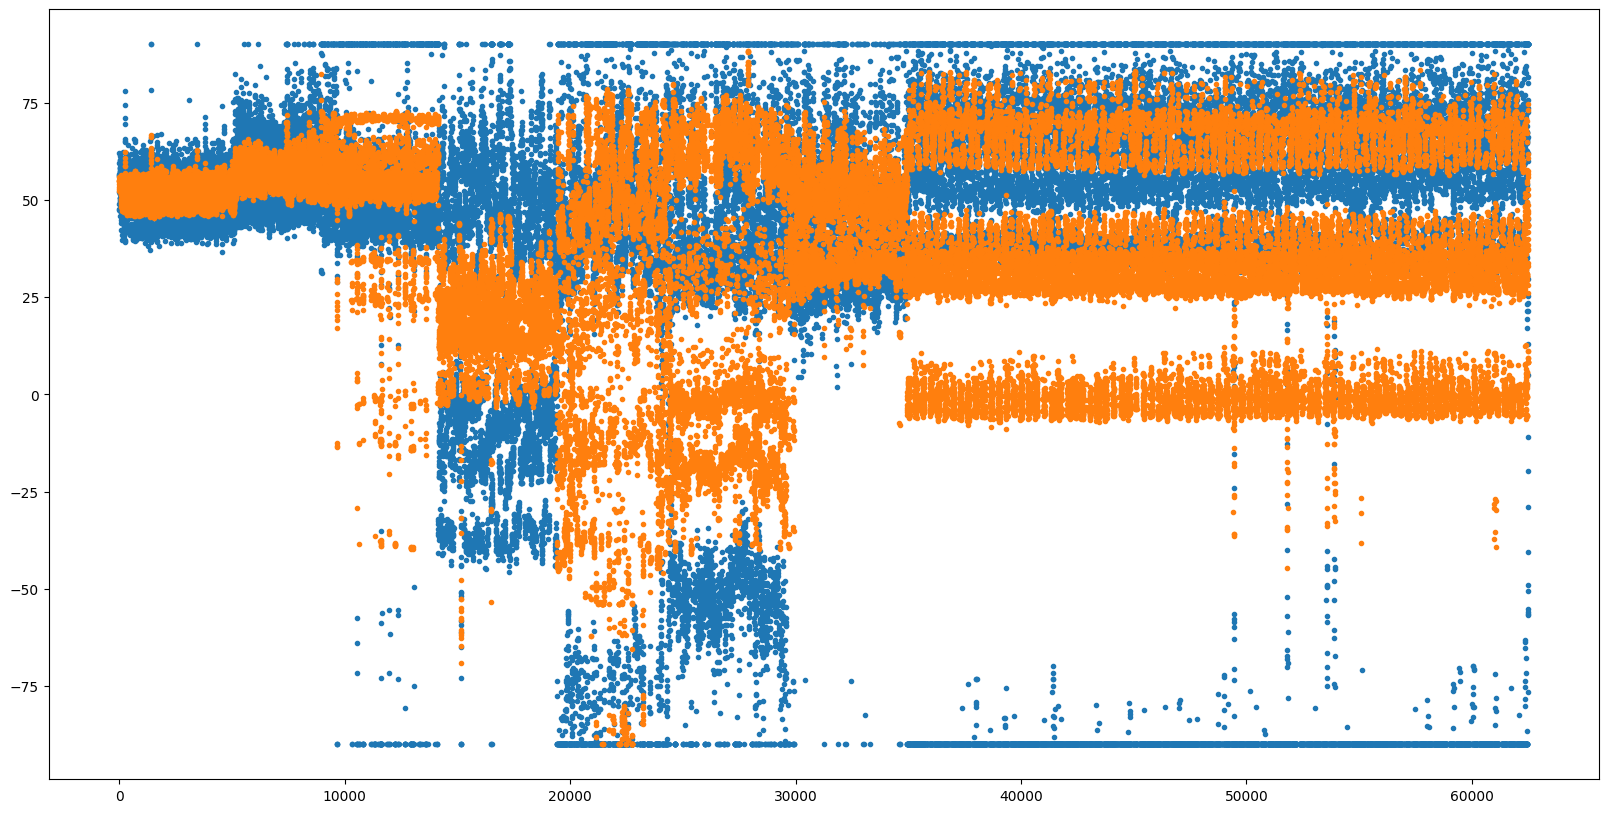

In [238]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))

aoas= np.concatenate(dataset[dataset["angle"] == 60]["aoa"].to_numpy())
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


plt.plot(aoas ,".")
plt.plot(running_mean(aoas,5) ,".")

In [243]:
dataset[dataset["capture"] != "tw2"]

,index,mac,timestamp,rssi,frequency,iq,angle,distance,capture,switch_order,ref,phases,aoa
0,0,c300000a7a48,2024-10-04T17:03:27.558Z,-55,2402,"[94, -140, 123, 116, -137, 97, -71, -157, 158,...",-90.0,100.0,tw,2-2-0-5-6,"[-0.9795042614277752, 0.7561178310516703, 2.52...","[-0.13998744521308112, 0.7395587375163315, 2.1...","[-67.03547119506719, -47.471889828010426, -61...."
1,1,c300000a7a48,2024-10-04T17:03:28.091Z,-57,2426,"[-128, -79, 107, -107, 93, 114, -134, 59, -37,...",-90.0,100.0,tw,2-2-0-5-6,"[-2.588631051595765, -0.7853981633974483, 0.88...","[-1.574096644845384, -0.4414290436740871, 0.94...","[-56.12750470070264, -47.825124255300636, -61...."
2,2,c300000a7a48,2024-10-04T17:03:28.614Z,-57,2426,"[107, 103, -122, 86, -68, -138, 140, -44, 21, ...",-90.0,100.0,tw,2-2-0-5-6,"[0.7663528474154319, 2.5275736165818525, -2.02...","[1.7354167422407016, 2.884093776595623, -2.019...","[-55.54371459632774, -47.89934381968251, -58.7..."
3,3,c300000a7a48,2024-10-04T17:03:29.148Z,-59,2480,"[-3, 185, -180, -18, 42, -180, 166, 73, -107, ...",-90.0,100.0,tw,2-2-0-5-6,"[1.5870111217992988, -3.0419240010986313, -1.3...","[1.0768549578753155, 2.402457752616702, -2.356...","[-49.581066923785016, -43.64796955681751, -42...."
4,4,c300000a7a48,2024-10-04T17:03:29.409Z,-59,2480,"[-175, -39, 79, -163, 159, 106, -114, 147, -11...",-90.0,100.0,tw,2-2-0-5-6,"[-2.922318747112096, -1.119493769638315, 0.588...","[3.011890116433881, -1.9843384163437636, -0.51...","[-50.817395774776784, -45.30812354698607, -47...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19301,196,c300000a7a46,2024-11-10T17:19:29.949Z,-63,2402,"[121, 113, -135, 93, -73, -154, 164, -50, 12, ...",0.0,900.0,camila,2-2-0-5-6,"[0.7512234397812532, 2.538362800665108, -2.013...","[3.0681055933022057, 0.7266423406817256, -2.19...","[10.00230140469657, -2.0236543088213006, 11.62..."
19302,197,c300000a7a46,2024-11-10T17:19:30.734Z,-67,2480,"[-36, -188, 188, -16, -54, 184, -188, -83, 93,...",0.0,900.0,camila,2-2-0-5-6,"[-1.7599953488948648, -0.08490179344972196, 1....","[1.5218159258711694, -1.215565464748215, 2.542...","[1.8443806608622877, 6.201107029084421, 13.901..."
19303,198,c300000a7a46,2024-11-10T17:19:30.995Z,-61,2426,"[162, -53, 9, 170, -177, -19, 34, -174, 156, 7...",0.0,900.0,camila,2-2-0-5-6,"[-0.31618474916148803, 1.5179045279291765, -3....","[2.5535900500422257, -0.4116713434318949, -3.0...","[-2.8235499173714254, 3.745486452403727, 0.812..."
19304,199,c300000a7a46,2024-11-10T17:19:31.529Z,-67,2480,"[-94, -121, 136, -62, 49, 156, -147, 47, -15, ...",0.0,900.0,camila,2-2-0-5-6,"[-2.2312670858626515, -0.42773491238624206, 1....","[0.7200706937740967, -1.5916266468311138, 1.91...","[10.621850602743653, 1.089685022190047, 7.6006..."
